In [1]:
# somewhat similar (but this written mostly before reading that)
#https://www.pluralsight.com/guides/deep-learning-model-add

In [2]:
!#pip install livelossplot --quiet

In [3]:
import tensorflow as tf
# tf.logging.set_verbosity(tf.logging.ERROR)
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

import numpy as np

Using TensorFlow backend.


In [4]:
trainingDataSize = 10000
epochs = 20

In [5]:
X = np.random.normal( loc=0, scale=100, size=[trainingDataSize,2] )


In [6]:
Y = X.sum(axis=1)
Ynoisy = Y + np.random.normal( scale = 3, size=trainingDataSize )

In [7]:
Y

array([  28.58647381, -120.98473487,   41.1813993 , ...,  136.9005329 ,
        -12.61021099, -240.20422191])

In [8]:
Ynoisy

array([  28.73450981, -124.74854221,   41.52027542, ...,  136.57435713,
         -6.56793794, -239.50898443])

In [9]:
model = Sequential([
    #Flatten(), # input_shape=(2,)
    Dense(units=2, activation='relu'),
    Dense(units=20, activation='relu'),
	Dense(units=20, activation='relu'),
    Dense(units=1)
])
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['mae'])

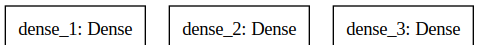

In [10]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [11]:
model.fit(X, Ynoisy, epochs=epochs, batch_size=100)


Epoch 1/20
10000/10000 [==============================] - 1s 69us/step - loss: 15825.3109 - mae: 98.1243
Epoch 2/20
10000/10000 [==============================] - 0s 14us/step - loss: 12342.1399 - mae: 82.0234
Epoch 3/20
10000/10000 [==============================] - 0s 15us/step - loss: 11010.6376 - mae: 71.4804
Epoch 4/20
10000/10000 [==============================] - 0s 15us/step - loss: 10535.7111 - mae: 68.1877
Epoch 5/20
10000/10000 [==============================] - 0s 15us/step - loss: 10110.1001 - mae: 64.9531
Epoch 6/20
10000/10000 [==============================] - 0s 15us/step - loss: 9634.5698 - mae: 61.7714
Epoch 7/20
10000/10000 [==============================] - 0s 14us/step - loss: 9044.8471 - mae: 58.1397
Epoch 8/20
10000/10000 [==============================] - 0s 15us/step - loss: 8278.2596 - mae: 53.8101
Epoch 9/20
10000/10000 [==============================] - 0s 14us/step - loss: 7327.6863 - mae: 48.9523
Epoch 10/20
10000/10000 [==============================] - 

In [12]:
model.predict(np.array([[101,102]]))

array([[203.54262]], dtype=float32)

In [13]:
model.predict(np.array([[95,100]]))

array([[195.24306]], dtype=float32)

In [14]:
model.predict(np.array([[1,2]]))

array([[-17.553835]], dtype=float32)

In [15]:
model.predict(np.array([[2,2]]))

array([[-10.417396]], dtype=float32)

In [16]:
model.predict(np.array([[100,-250]]))

array([[-135.61598]], dtype=float32)

In [17]:
model.predict(np.array([[10000,-2500]]))

array([[7550.0537]], dtype=float32)